In [3]:
import nibabel as nib
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
import os
import scipy.ndimage as ndi
import pandas as pd
import pywt
import numpy as np
import seaborn as sns
from skimage.feature import graycomatrix, graycoprops

#EDA

In [4]:
expanded_features_df = pd.read_csv('expanded_oasis1_cross_sectional (2).csv')
expanded_features_df = expanded_features_df.drop(columns=['Unnamed: 0'])
expanded_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             331 non-null    object 
 1   M/F            331 non-null    object 
 2   Hand           331 non-null    object 
 3   Age            331 non-null    int64  
 4   Educ           177 non-null    float64
 5   SES            159 non-null    float64
 6   MMSE           177 non-null    float64
 7   CDR            177 non-null    float64
 8   eTIV           331 non-null    int64  
 9   nWBV           331 non-null    float64
 10  ASF            331 non-null    float64
 11  Delay          18 non-null     float64
 12  LL_mean        331 non-null    float64
 13  LL_std         331 non-null    float64
 14  LH_mean        331 non-null    float64
 15  LH_std         331 non-null    float64
 16  LH_min         331 non-null    float64
 17  LH_max         331 non-null    float64
 18  contrast  

###BALANCEAR

The class distribution of the CDR column is imbalanced, with the majority class being 0 (108 instances), followed by 1 (49 instances), and 2 (20 instances). To balance the categories of CDR, we can use techniques such as oversampling the minority classes or undersampling the majority class. In this case, since the dataset is relatively small, oversampling might be a better option.

In [5]:
expanded_features_df0 = expanded_features_df.dropna(subset=['CDR', 'MMSE'])
expanded_features_df0 = expanded_features_df0.drop(columns=['Delay'])
expanded_features_df0['SES'].fillna(expanded_features_df0['SES'].mean(), inplace=True)
expanded_features_df0

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,...,LH_max,contrast,dissimilarity,homogeneity,energy,correlation,GMV,WMV,CSFV,GWMR
0,OAS1_0001_MR1,F,R,74,2.0,3.000000,29.0,0.0,1344,0.743,...,1.166667,77.856664,4.259717,0.590903,0.477606,0.995400,501154,742507,423603,0.674949
1,OAS1_0002_MR1,F,R,55,4.0,1.000000,29.0,0.0,1147,0.810,...,1.300000,74.323123,3.873737,0.614190,0.477833,0.996109,543332,811579,312353,0.669475
2,OAS1_0003_MR1,F,R,73,4.0,3.000000,27.0,0.5,1454,0.708,...,1.433333,79.591458,4.273935,0.589544,0.477420,0.995255,464935,720266,482063,0.645505
8,OAS1_0010_MR1,M,R,74,5.0,2.000000,30.0,0.0,1636,0.689,...,1.666667,77.659475,4.152833,0.597742,0.477601,0.995367,502736,650970,513558,0.772288
9,OAS1_0011_MR1,F,R,52,3.0,2.000000,30.0,0.0,1321,0.827,...,1.400000,74.903876,3.842062,0.614168,0.477988,0.996156,538844,844337,284083,0.638186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,OAS1_0374_MR1,F,R,73,3.0,3.000000,29.0,0.5,1238,0.760,...,1.233333,85.149045,4.368083,0.588627,0.477266,0.995213,529007,742581,395676,0.712390
308,OAS1_0378_MR1,F,R,58,2.0,2.000000,30.0,0.0,1418,0.821,...,1.466667,74.257137,3.878733,0.604985,0.477809,0.996158,548928,824840,293496,0.665496
310,OAS1_0380_MR1,F,R,83,1.0,5.000000,18.0,0.5,1313,0.705,...,1.333333,84.361331,4.231390,0.597069,0.477283,0.994946,540980,638067,488217,0.847842
311,OAS1_0381_MR1,M,R,59,4.0,2.000000,29.0,0.0,1795,0.809,...,1.133333,79.860397,4.231445,0.595731,0.477629,0.995739,556642,795860,314762,0.699422


In [6]:
expanded_features_df0.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Age,177.0,71.734463,12.573086,33.000000,51.000000,65.000000,73.000000,81.000000,86.400000,89.000000,90.720000,94.000000
Educ,177.0,3.197740,1.297023,1.000000,2.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
SES,177.0,2.484277,1.081116,1.000000,1.000000,2.000000,2.484277,3.000000,4.000000,4.000000,5.000000,5.000000
MMSE,177.0,27.293785,3.604545,14.000000,22.000000,27.000000,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000
CDR,177.0,0.257062,0.365825,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,2.000000
eTIV,177.0,1457.468927,162.031739,1123.000000,1280.000000,1341.000000,1446.000000,1547.000000,1696.200000,1768.200000,1862.880000,1911.000000
nWBV,177.0,0.750345,0.049194,0.644000,0.689000,0.709000,0.752000,0.787000,0.819400,0.829400,0.839480,0.847000
ASF,177.0,1.218582,0.131756,0.919000,1.034600,1.134000,1.214000,1.309000,1.371000,1.431400,1.523400,1.563000
LL_mean,177.0,2.121620,0.095414,1.920972,1.996781,2.044143,2.114953,2.200616,2.251772,2.267696,2.293350,2.305441
LL_std,177.0,2.213588,0.079029,2.048830,2.112315,2.147813,2.211816,2.277927,2.323147,2.335264,2.355391,2.372359


In [7]:
# Codificar al sexo masculino como 1 y al femenino como 0
def encode_sex(sex):
    if sex == 'M':
        return 1
    elif sex == 'F':
        return 0
    else:
        return None  # Handle other cases if necessary

expanded_features_df0['M/F'] = expanded_features_df0['M/F'].apply(encode_sex)
expanded_features_df0

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,...,LH_max,contrast,dissimilarity,homogeneity,energy,correlation,GMV,WMV,CSFV,GWMR
0,OAS1_0001_MR1,0,R,74,2.0,3.000000,29.0,0.0,1344,0.743,...,1.166667,77.856664,4.259717,0.590903,0.477606,0.995400,501154,742507,423603,0.674949
1,OAS1_0002_MR1,0,R,55,4.0,1.000000,29.0,0.0,1147,0.810,...,1.300000,74.323123,3.873737,0.614190,0.477833,0.996109,543332,811579,312353,0.669475
2,OAS1_0003_MR1,0,R,73,4.0,3.000000,27.0,0.5,1454,0.708,...,1.433333,79.591458,4.273935,0.589544,0.477420,0.995255,464935,720266,482063,0.645505
8,OAS1_0010_MR1,1,R,74,5.0,2.000000,30.0,0.0,1636,0.689,...,1.666667,77.659475,4.152833,0.597742,0.477601,0.995367,502736,650970,513558,0.772288
9,OAS1_0011_MR1,0,R,52,3.0,2.000000,30.0,0.0,1321,0.827,...,1.400000,74.903876,3.842062,0.614168,0.477988,0.996156,538844,844337,284083,0.638186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,OAS1_0374_MR1,0,R,73,3.0,3.000000,29.0,0.5,1238,0.760,...,1.233333,85.149045,4.368083,0.588627,0.477266,0.995213,529007,742581,395676,0.712390
308,OAS1_0378_MR1,0,R,58,2.0,2.000000,30.0,0.0,1418,0.821,...,1.466667,74.257137,3.878733,0.604985,0.477809,0.996158,548928,824840,293496,0.665496
310,OAS1_0380_MR1,0,R,83,1.0,5.000000,18.0,0.5,1313,0.705,...,1.333333,84.361331,4.231390,0.597069,0.477283,0.994946,540980,638067,488217,0.847842
311,OAS1_0381_MR1,1,R,59,4.0,2.000000,29.0,0.0,1795,0.809,...,1.133333,79.860397,4.231445,0.595731,0.477629,0.995739,556642,795860,314762,0.699422


In [8]:
print(expanded_features_df0.columns)
expanded_features_df0 = expanded_features_df0.drop(columns=['ID','Hand'])
print(expanded_features_df0.columns)

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'LL_mean', 'LL_std', 'LH_mean', 'LH_std', 'LH_min',
       'LH_max', 'contrast', 'dissimilarity', 'homogeneity', 'energy',
       'correlation', 'GMV', 'WMV', 'CSFV', 'GWMR'],
      dtype='object')
Index(['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF',
       'LL_mean', 'LL_std', 'LH_mean', 'LH_std', 'LH_min', 'LH_max',
       'contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation',
       'GMV', 'WMV', 'CSFV', 'GWMR'],
      dtype='object')


<Axes: >

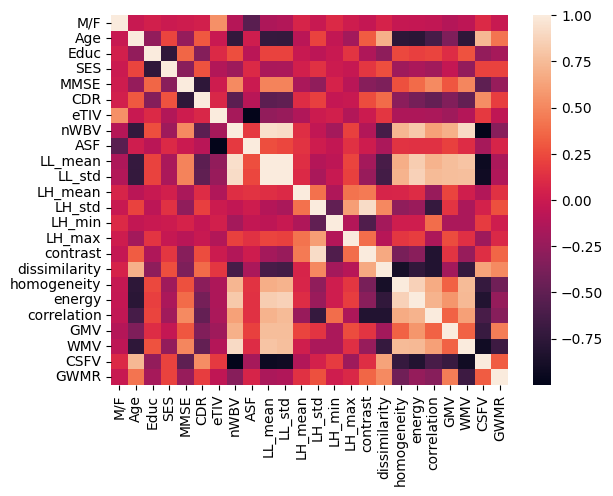

In [9]:
correlation_matrix = expanded_features_df0.corr()
sns.heatmap(correlation_matrix, annot=False)

In [10]:
columns = np.full((correlation_matrix.shape[0], ), True, dtype=bool)
for i in range(correlation_matrix.shape[0]):
    for j in range(i+1, correlation_matrix.shape[0]):
        if correlation_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = expanded_features_df0.columns[columns]
expanded_features_df0 = expanded_features_df0[selected_columns]

<Axes: >

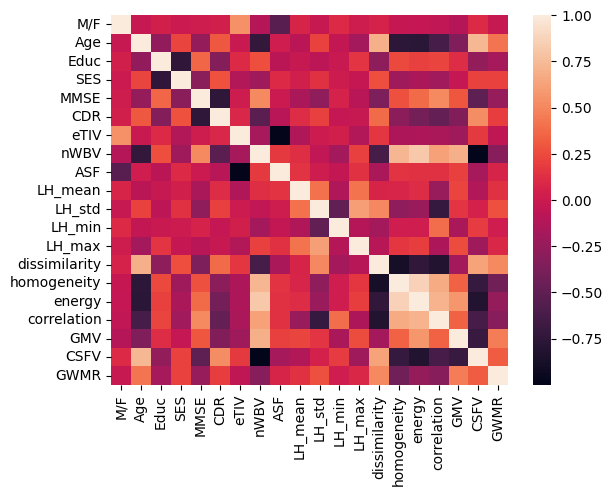

In [11]:
correlation_matrix = expanded_features_df0.corr()
sns.heatmap(correlation_matrix, annot=False)

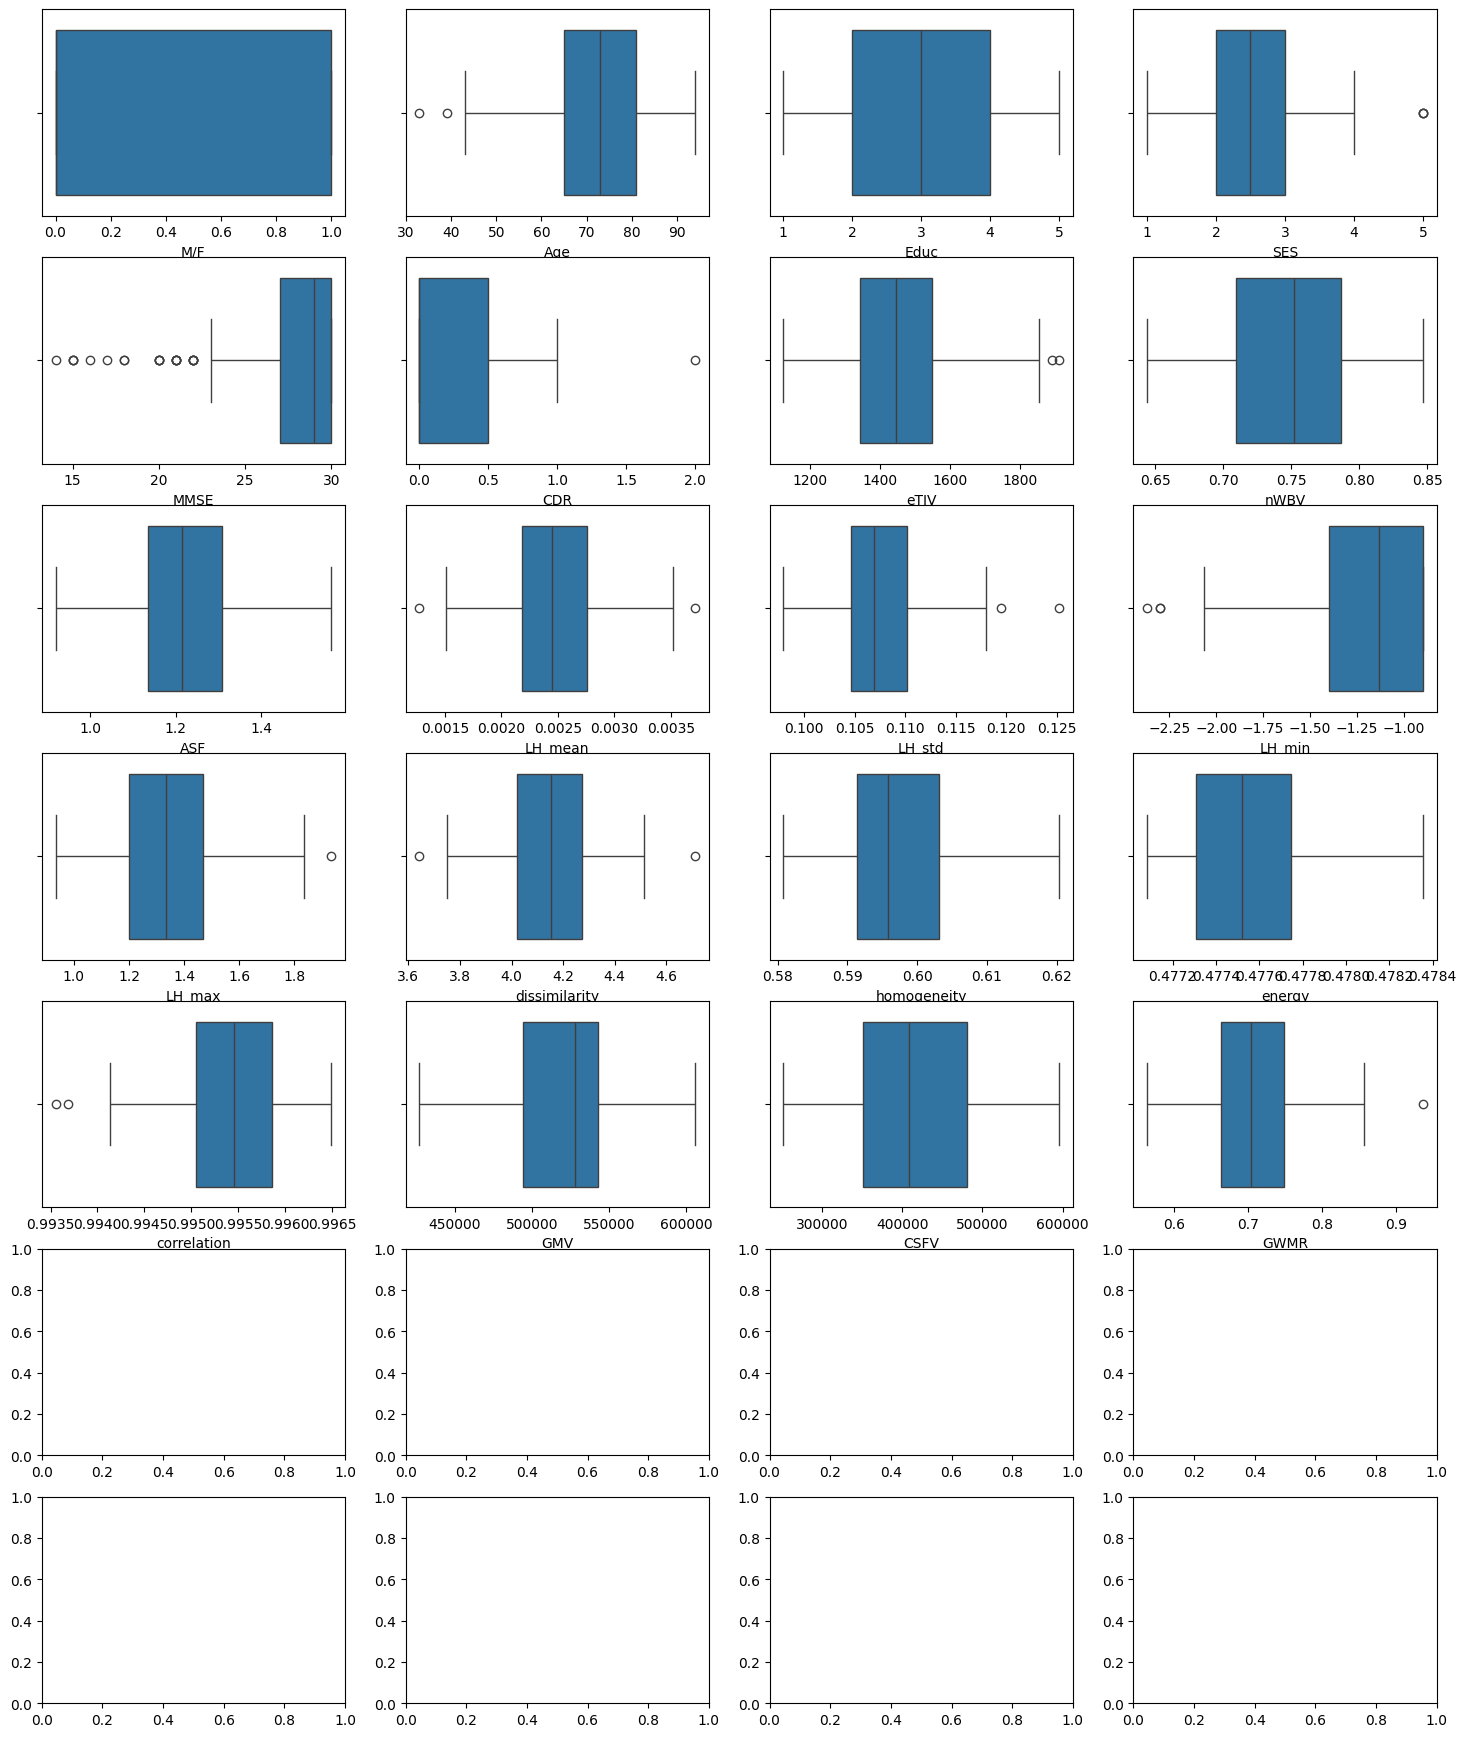

In [12]:
fig, ax = plt.subplots(7, 4, figsize=(18, 22))
for i, feature in enumerate(expanded_features_df0):
        sns.boxplot(x=expanded_features_df0[feature], ax=ax[i//4, i%4])

array([[<Axes: title={'center': 'M/F'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Educ'}>,
        <Axes: title={'center': 'SES'}>],
       [<Axes: title={'center': 'MMSE'}>,
        <Axes: title={'center': 'CDR'}>,
        <Axes: title={'center': 'eTIV'}>,
        <Axes: title={'center': 'nWBV'}>],
       [<Axes: title={'center': 'ASF'}>,
        <Axes: title={'center': 'LH_mean'}>,
        <Axes: title={'center': 'LH_std'}>,
        <Axes: title={'center': 'LH_min'}>],
       [<Axes: title={'center': 'LH_max'}>,
        <Axes: title={'center': 'dissimilarity'}>,
        <Axes: title={'center': 'homogeneity'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'correlation'}>,
        <Axes: title={'center': 'GMV'}>,
        <Axes: title={'center': 'CSFV'}>,
        <Axes: title={'center': 'GWMR'}>]], dtype=object)

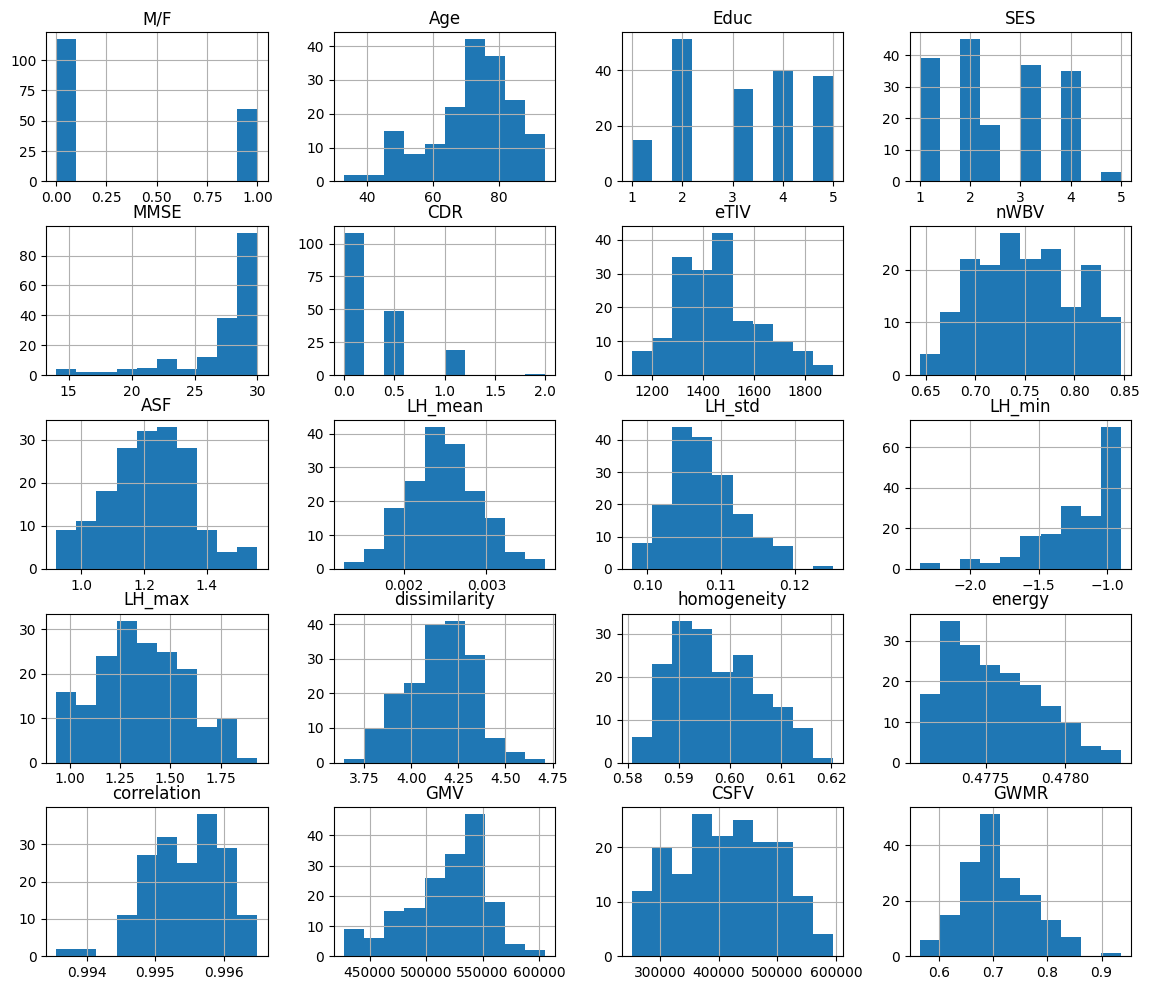

In [13]:
expanded_features_df0.hist(figsize=(14, 12))

Hay un valor de CDR=2

In [14]:
expanded_features_df0['CDR'] = expanded_features_df0['CDR'].replace(2, 1.)

In [15]:
# Ahora vamos a categorizar el target: CDR
cdr_mapping = {0: 0, 0.5: 1, 1: 2}# {0: 'no dementia', 0.5: 'very mild AD', 1: 'mild AD'}

# Replace values in the target column "CDR" using the mapping
expanded_features_df0['CDR'] = expanded_features_df0['CDR'].map(cdr_mapping )
expanded_features_df0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 0 to 312
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   M/F            177 non-null    int64  
 1   Age            177 non-null    int64  
 2   Educ           177 non-null    float64
 3   SES            177 non-null    float64
 4   MMSE           177 non-null    float64
 5   CDR            177 non-null    int64  
 6   eTIV           177 non-null    int64  
 7   nWBV           177 non-null    float64
 8   ASF            177 non-null    float64
 9   LH_mean        177 non-null    float64
 10  LH_std         177 non-null    float64
 11  LH_min         177 non-null    float64
 12  LH_max         177 non-null    float64
 13  dissimilarity  177 non-null    float64
 14  homogeneity    177 non-null    float64
 15  energy         177 non-null    float64
 16  correlation    177 non-null    float64
 17  GMV            177 non-null    int64  
 18  CSFV           

#Machine Learning

In [16]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [17]:
from imblearn.combine import SMOTEENN

In [18]:
y = expanded_features_df0['CDR']
X = expanded_features_df0.drop(columns=["CDR"])

#Over-sampling

nuevas muestras sintéticas para la clase minoritaria, en lugar de simplemente duplicar ejemplos existentes. Esto se hace creando nuevas muestras interpolando entre ejemplos existentes de la clase minoritaria.
ENN elimina las muestras que están mal clasificadas por sus vecinos más cercanos

###usando smoteenn

In [19]:
#smote_enn = SMOTEENN(random_state=42)###############333
#X, y = smote_enn.fit_resample(X, y)

###Usando  ADASYN

In [20]:
from imblearn.over_sampling import ADASYN
# Aplicar ADASYN para hacer oversampling en los datos de entrenamiento
adasyn = ADASYN(random_state=42)
#X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
X, y = adasyn.fit_resample(X, y)

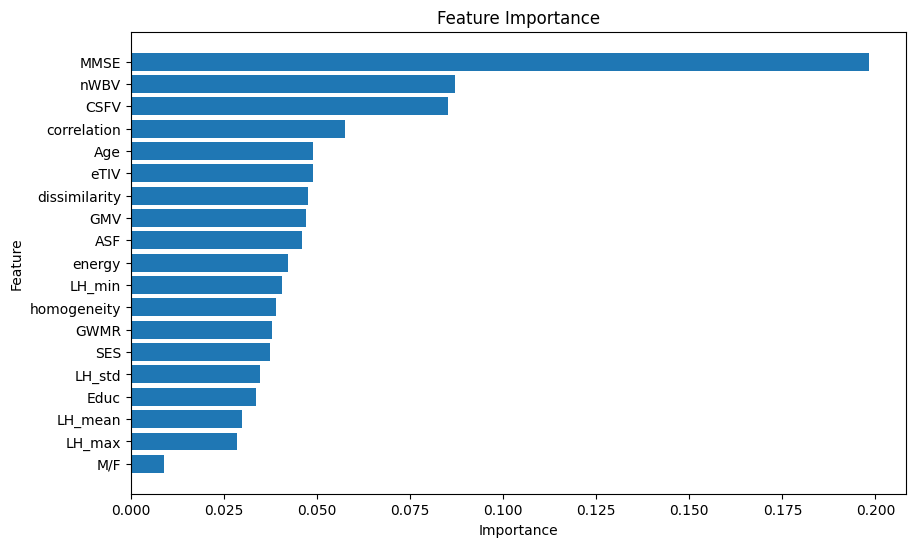

In [21]:


# Entrenar el modelo Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X, y)

# Obtener la importancia de las características
feature_importances = rf_classifier.feature_importances_

# Crear un DataFrame para visualizar la importancia
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [22]:
# Seleccionar las 10 características más importantes
top_features = features_df.iloc[1:9]['Feature'].tolist()
X_top = X[top_features]


In [23]:

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# Entrenar el modelo con las características seleccionadas
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf_model.fit(X_train, y_train)

# Evaluar el modelo
predictions = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Resultados con características seleccionadas")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Resultados con características seleccionadas
Accuracy: 0.6770833333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.62      0.60        29
           1       0.71      0.54      0.61        41
           2       0.74      0.96      0.83        26

    accuracy                           0.68        96
   macro avg       0.68      0.71      0.68        96
weighted avg       0.68      0.68      0.67        96



#Validación cruzada

In [24]:
# Realizar validación cruzada con 5 pliegues
cv_scores = cross_val_score(best_rf_model, X_top, y, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.71875  0.796875 0.8125   0.765625 0.765625]
Mean cross-validation score: 0.771875


#Modificación de Hiperparámetros


In [25]:
# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [26]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Realizar predicciones y evaluar el modelo
predictions = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

print("Resultados RF con mejores hiperparámetros")
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_rep)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Resultados RF con mejores hiperparámetros
Accuracy: 0.6979166666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.66      0.63        29
           1       0.77      0.56      0.65        41
           2       0.71      0.96      0.82        26

    accuracy                           0.70        96
   macro avg       0.70      0.73      0.70        96
weighted avg       0.71      0.70      0.69        96

